# Potato Disease Classification

Dataset credits: https://www.kaggle.com/arjuntejaswi/plant-village

https://drive.google.com/file/d/1k_uVnTU_maAoz1rVnjqYOQLrImOa8vlC/view?usp=sharing

In [32]:
# !gdown --id 1k_uVnTU_maAoz1rVnjqYOQLrImOa8vlC

In [33]:
# !unrar x /content/'Копия PlantVillage'.rar

## Import all the Dependencies

In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

### Import data into tensorflow dataset object

Used splitfolders tool to split dataset into training, validation and test directories.

$ pip install split-folders

$ splitfolders --ratio 0.8 0.1 0.1 -- ./content/PlantVillag

In [4]:
#  pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import splitfolders
splitfolders.ratio('/content/PlantVillage', output="output", seed=1337, ratio=(.8, 0.1,0.1)) 

Copying files: 2152 files [00:00, 6150.84 files/s]


## Set all the Constants

In [6]:
IMAGE_SIZE = 256
CHANNELS = 3

# create Image data generator

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        '/content/output/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 1721 images belonging to 3 classes.


In [8]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [9]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [10]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        '/content/output/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [11]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        '/content/output/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 216 images belonging to 3 classes.


## Building the Model

In [12]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

## Compiling the Model

We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric



In [14]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [15]:
1721/32

53.78125

In [16]:
215/32

6.71875

In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch=53,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
53/53 [==============================] - 47s 569ms/step - loss: 0.9162 - accuracy: 0.4778 - val_loss: 0.8665 - val_accuracy: 0.4792
Epoch 2/20
53/53 [==============================] - 31s 579ms/step - loss: 0.7796 - accuracy: 0.6063 - val_loss: 0.6146 - val_accuracy: 0.6823
Epoch 3/20
53/53 [==============================] - 32s 592ms/step - loss: 0.4690 - accuracy: 0.7993 - val_loss: 0.4416 - val_accuracy: 0.8177
Epoch 4/20
53/53 [==============================] - 29s 552ms/step - loss: 0.3540 - accuracy: 0.8620 - val_loss: 0.3290 - val_accuracy: 0.8698
Epoch 5/20
53/53 [==============================] - 31s 581ms/step - loss: 0.2799 - accuracy: 0.8887 - val_loss: 0.4390 - val_accuracy: 0.8646
Epoch 6/20
53/53 [==============================] - 31s 582ms/step - loss: 0.2471 - accuracy: 0.9035 - val_loss: 0.3935 - val_accuracy: 0.8646
Epoch 7/20
53/53 [==============================] - 31s 578ms/step - loss: 0.2134 - accuracy: 0.9153 - val_loss: 0.1999 - val_accuracy: 0.9427

In [18]:
scores = model.evaluate(test_generator)

7/7 [==============================] - 4s 510ms/step - loss: 0.1032 - accuracy: 0.9815


You can see above that we get 100.00% accuracy for our test dataset. This is considered to be a pretty good accuracy

In [19]:
scores

[0.10317789018154144, 0.9814814925193787]

Scores is just a list containing loss and accuracy value

## Plotting the Accuracy and Loss Curves

In [20]:
history

In [21]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 53}

In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch

In [23]:
type(history.history['loss'])

list

In [24]:
len(history.history['loss'])

20

In [25]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9162023663520813,
 0.7796273827552795,
 0.46895384788513184,
 0.3540032207965851,
 0.2799251675605774]

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

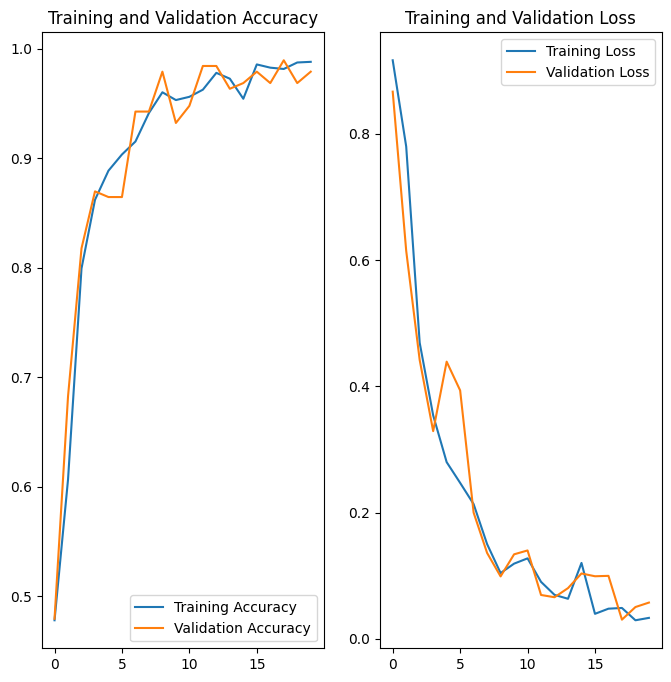

In [27]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Run prediction on a sample image

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 0s 167ms/step
predicted label: Potato___Early_blight


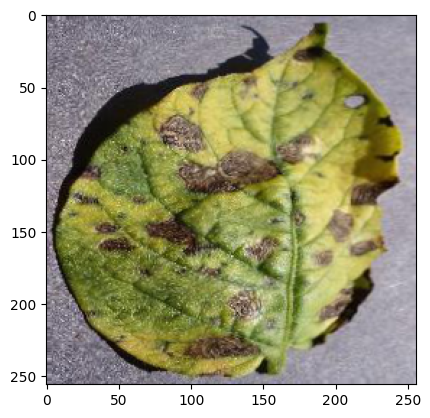

In [28]:
import numpy as np


for images_batch, labels_batch in test_generator:
    first_image = images_batch[0]
    first_label = int(labels_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

## Write a function for inference

In [29]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

Now run inference on few sample images

In [30]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

Output hidden; open in https://colab.research.google.com to view.

## Saving the Model

Save model in h5 format so that there is just one file and we can upload that for deployment



In [31]:
model.save("content/potatoes.h5")